### Decision Tree

#### Build Decision Tree on Iris Dataset


The Iris Dataset consists of 3 different types of iris flower: Setosa, Versicolour, and Virginica. It includes three iris species with 50 samples each as well as some properties about each flower. The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

See https://en.wikipedia.org/wiki/Iris_flower_data_set for more information on this dataset.


In [1]:
# Import useful libararies used for data management

import numpy as np
import pandas as pd

In [2]:
# load Iris Dataset
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

data = pd.read_csv('iris.csv')

# Use .info() to get the types of features
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html

data.info()

# display the first 5 records
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


#### Preprocessing on Training Set and Test Set

In [3]:
# use .value_counts() to get the frequency of each unique value
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html

data['variety'].value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

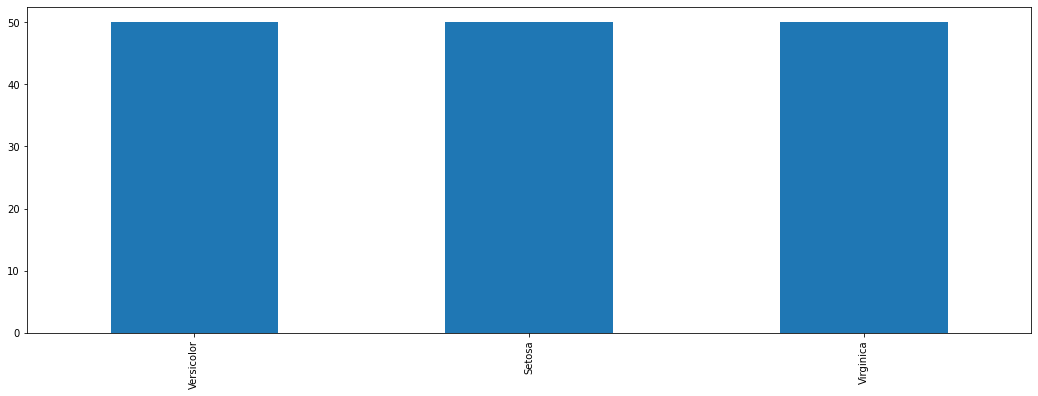

In [4]:
# Import useful libraries for data visualization

import matplotlib.pyplot as plt
%matplotlib inline

# set the size of figure
# https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figure.html

fig = plt.figure(figsize=(18,6))

# Use .plot(kind='bar') to create bar chart for a categorical variable
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot

ax=data['variety'].value_counts().plot(kind='bar')

In [5]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html#pandas.DataFrame.columns
# https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html

features = list(data.columns[0:4])

features

['sepal.length', 'sepal.width', 'petal.length', 'petal.width']

In [6]:
# assign the target variable 

target = ['variety']

target

['variety']

In [7]:
# use the names of attributes to split them into independent variables X and target variable y

X = data[features]
y = data[target]

## Split Data

- We will randomly split the data into training dataset (60%) and testing dataset (40%)
- Training dataset is used to train the model, in this case, we will train a decision tree model
- Testing dataset is for testing purpose. We can compare the predicted value against the true value in order to evaluate the model performance

In [8]:
#import functions for data split

from sklearn.model_selection import train_test_split

# test_size=0.4 means 40% testing dataset. In order to have the same split result, let’s use the same random_state
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [9]:
# Import Decision Tree Classifier from sklearn

from sklearn.tree import DecisionTreeClassifier

# Define model to be decision tree classifier
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

model = DecisionTreeClassifier()

# train model using training dataset
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.fit

model.fit(X_train, y_train)
# model building

DecisionTreeClassifier()

**The model parameters shown above are very important in the tuning process and will be discussed in more details later**

You can change the values of the parameters in the function to change impurity measure, perform pre-pruning, etc. For example, you can use the following command alterantively to replace the default **model = DecisionTreeClassifier()**.

**model = DecisionTreeClassifier(criterion='entropy',max_depth=2, min_samples_split=3)**

In [10]:
# import libraries for visuaiization
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn import tree

# use export_graphviz to visualize the tree
# see https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

dot_data = tree.export_graphviz(model, out_file='tree.dot', 
                      feature_names=features,  
                      class_names=model.classes_,
                      filled = True, rounded=True,  
                      special_characters=True )


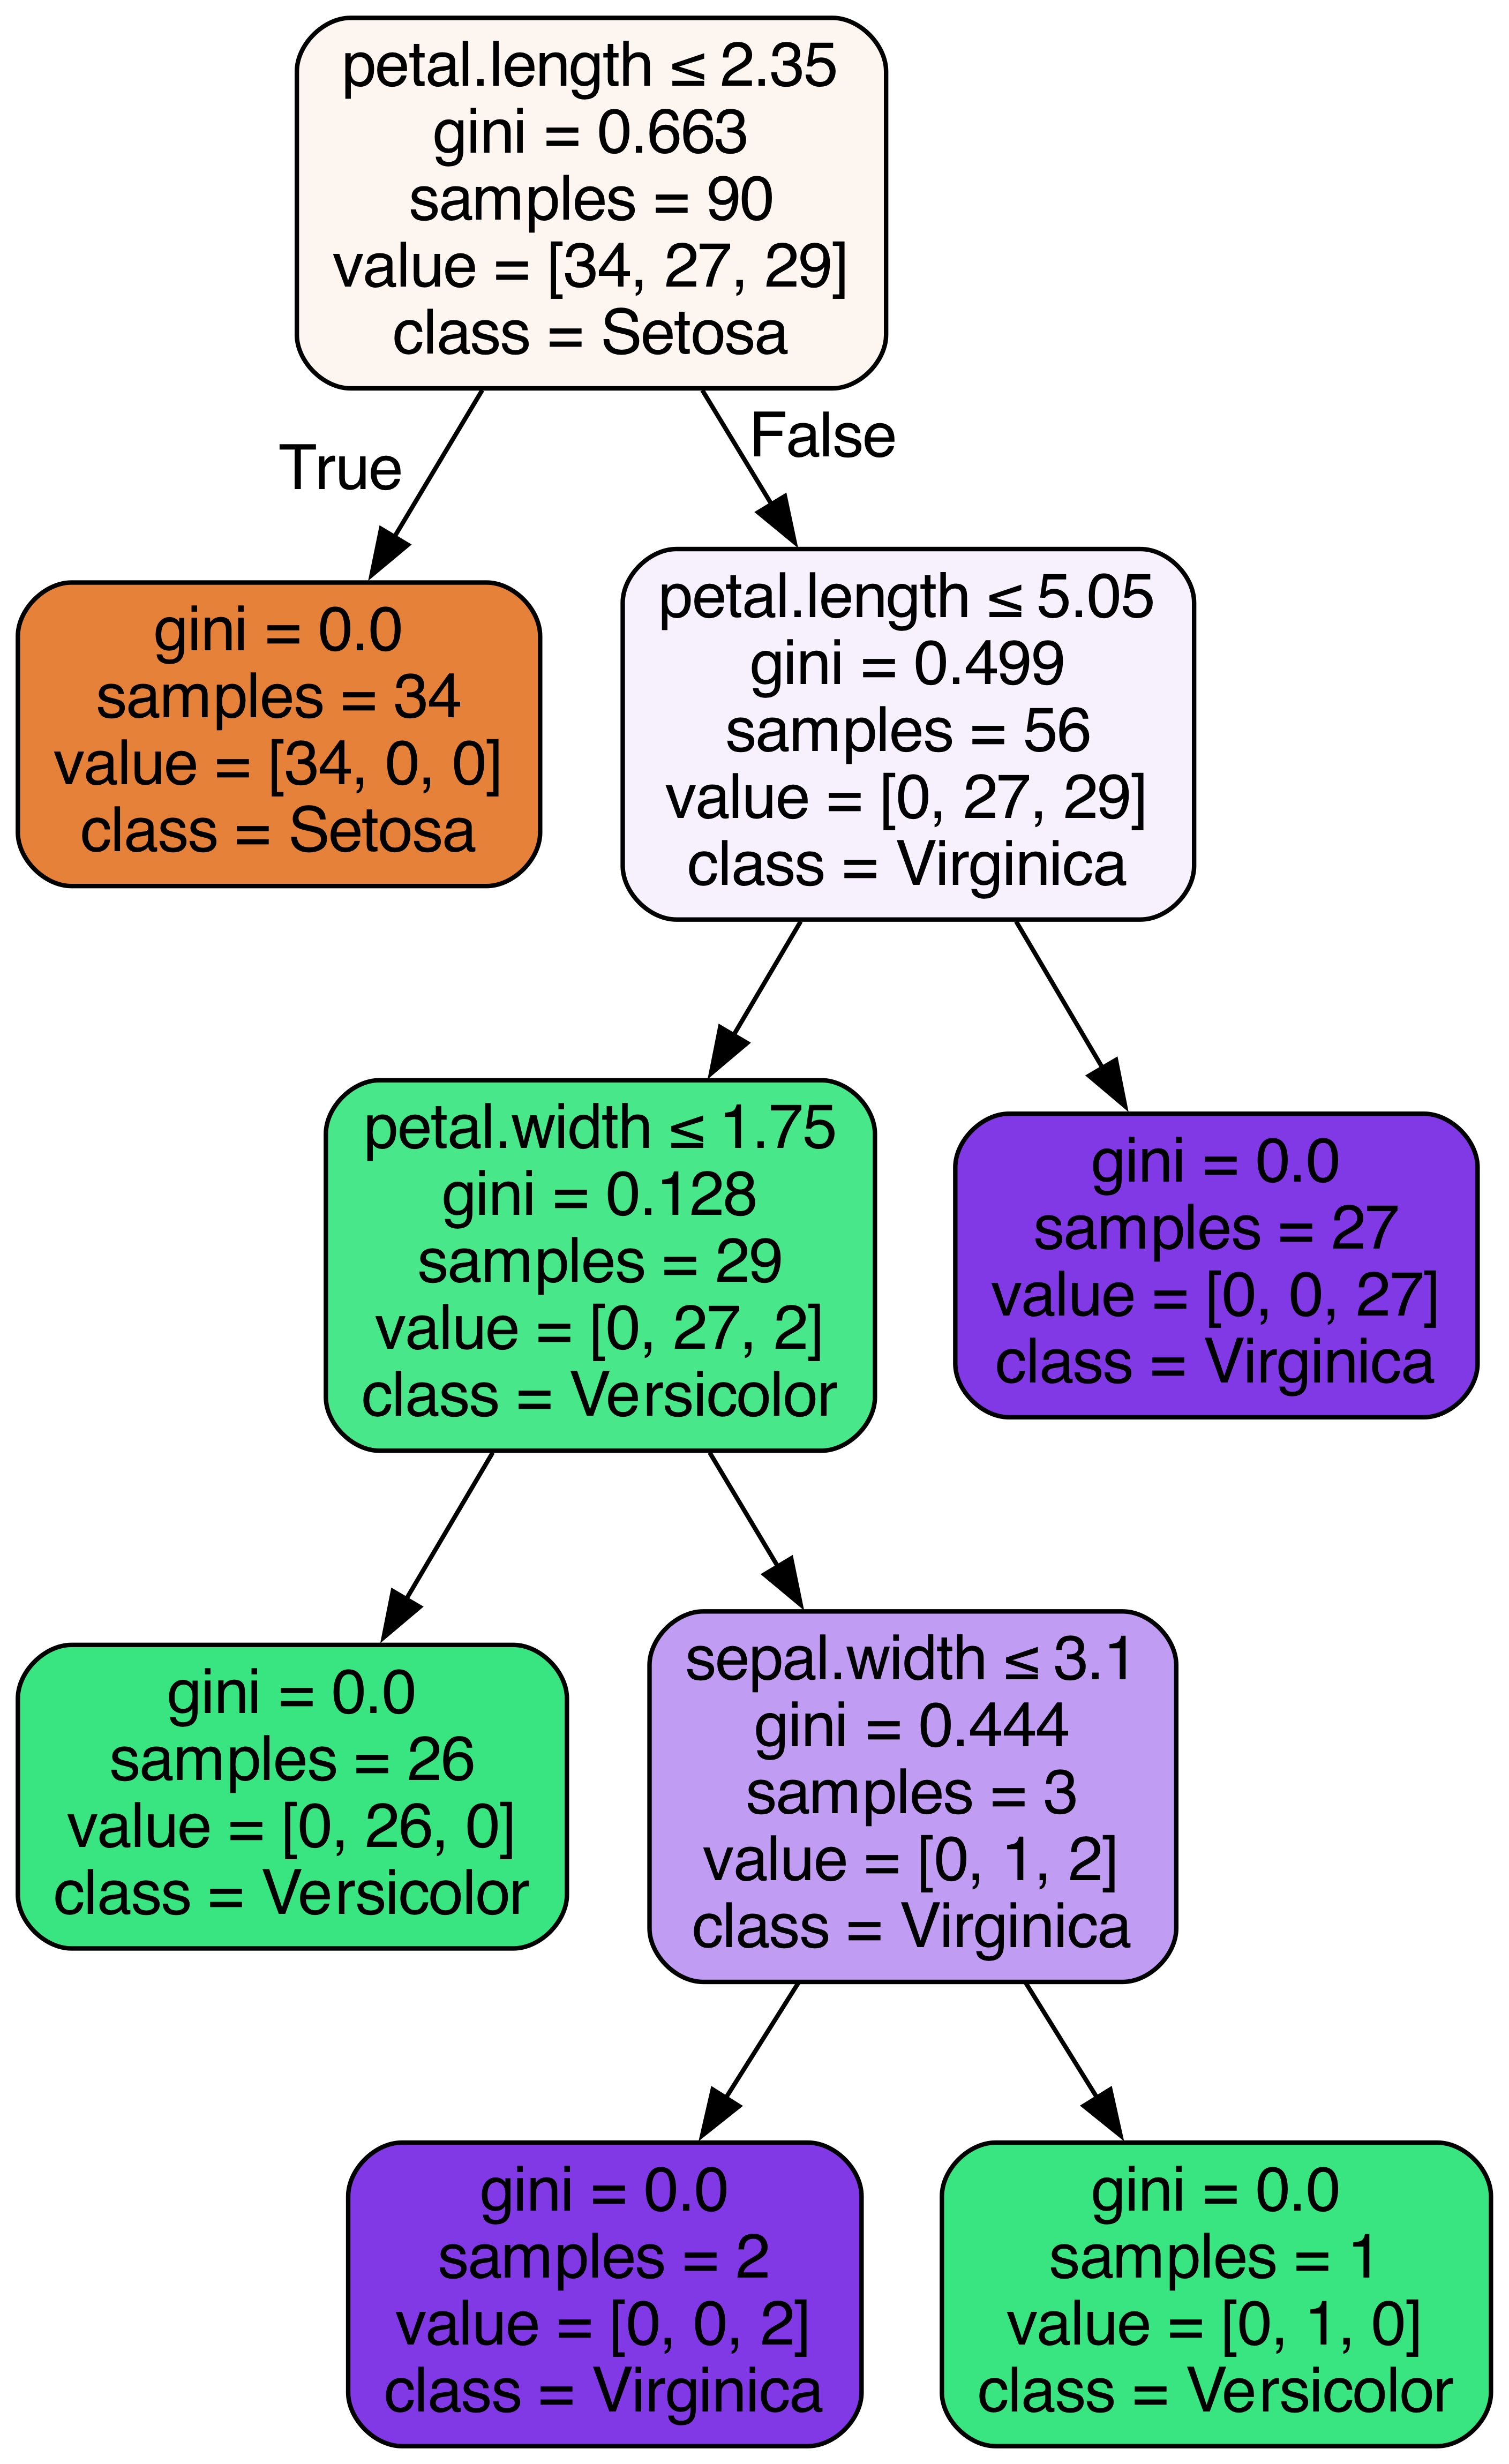

In [11]:
# Transform dot file to png format
!dot -Tpng tree.dot -o tree.png -Gdpi=600

#Create a png file
Image(filename = 'tree.png')

### Model Testing

- We just build the very first tree using the default parameter settings, what would be the predicting result on testing dataset?

In [12]:
# test model
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict

y_pred = model.predict(X_test)
y_pred

array(['Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Virginica', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Setosa', 'Versicolor', 'Versicolor', 'Setosa',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Versicolor',
       'Setosa', 'Virginica', 'Versicolor', 'Setosa', 'Virginica',
       'Virginica', 'Versicolor', 'Setosa', 'Virginica', 'Versicolor',
       'Versicolor', 'Virginica', 'Setosa', 'Virginica', 'Setosa',
       'Setosa', 'Versicolor', 'Virginica', 'Virginica', 'Versicolor',
       'Virginica', 'Versicolor', 'Virginica', 'Versicolor', 'Versicolor',
       'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor',
       'Virginica'], dtype=object)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# evaluate result 
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
print("Accuracy:",accuracy_score(y_pred, y_test, normalize=True, sample_weight=None))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report
print("Classification Report:",classification_report(y_pred, y_test))

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
print("Confusion Matrix:", confusion_matrix(y_pred, y_test))

Accuracy: 0.95
Classification Report:               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        16
  Versicolor       0.96      0.92      0.94        24
   Virginica       0.90      0.95      0.93        20

    accuracy                           0.95        60
   macro avg       0.95      0.96      0.95        60
weighted avg       0.95      0.95      0.95        60

Confusion Matrix: [[16  0  0]
 [ 0 22  2]
 [ 0  1 19]]
